# Introduction

The World Happiness Report (WHR) ranks 156 countries by how happy their citizens perceive themselves to be. Specifically, the 2020 WHR explores how social, urban, and natural environments combine to affect our happiness. 

The variables used in the report to determine a country's happiness score include having someone to count on, having freedom to make life choices, generosity, life expectancy, trust in the goverment, and GDP per capita. These factors are defined in the next section. 

Let's analyze world happiness data from 2015 to 2020 to see if there are any interesting trends.

Table of Contents
* [Variable Definitions](#variable_definitions)
* [Data Cleaning](#data_cleaning) 
* [EDA](#eda)
* [References](#references)


## Variable Definitions

<a id="variable_definitions"></a>
* Happiness score (or ladder score): national average response to the question of life evaluations scaled from 0 to 10, 10 being the best possible life. 
* GDP per capita: breaks down a country's economic output per person and is calculated by dividing the GDP of a country by its population. It is a global measure for gauging the prosperity of a country based on its economic growth. 
* Healthy life expectancy: "Average number of years that a person can expect to live in 'full health' by taking into account years lived in less than full health due to disease and/or injury." This data was extracted from the World Health Organization (WHO) Global Health Observatory data repository. 
* Social support: having someone to count on in times of trouble. It is the "national average of the binary responses (either 0 or 1) to the question: 'If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?'"
* Freedom to make life choices: "the national average response to the GWP question: 'Are you satisfied or dissatisfied with your freedom to choose what you do with your life?'"
* Generosity: the residual of regressing national average response to the question: "Have you donated money to charity in the past month?"
* Corruption perception (government corruption): the national average of the survey responses to the following: "Is corruption widespread throughout the government?" In the case that the perception of governement corruption data is missing, the perception of business corruption is the overall perception. 

## Other Terms Defined
* Dystopia: imaginary country that has the world's unhappiest people, created to serve as a benchmark against which all countries can be favorably compared to, as no country performs more poorly than Dystopia. 
* Residuals: unexplained components that differ for each country, reflecting the extent to which the 6 variables either over or under explain average life evaluations. The residuals have an average value of approximately 0 across all the countries. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot






# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/world-happiness-report'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/world-happiness-report/2020.csv
../input/world-happiness-report/2017.csv
../input/world-happiness-report/2019.csv
../input/world-happiness-report/2015.csv
../input/world-happiness-report/2016.csv
../input/world-happiness-report/2018.csv


## Data Cleaning
<a id="data_cleaning"></a>

Let's clean the data


In [2]:
# Preliminary Data Processing

# To start off, we read in our dataset and generate a simple preview and statistics of our data.

year_2015 = pd.read_csv('../input/world-happiness-report/2015.csv')
year_2016 = pd.read_csv('../input/world-happiness-report/2016.csv')
year_2017 = pd.read_csv('../input/world-happiness-report/2017.csv')
year_2018 = pd.read_csv('../input/world-happiness-report/2018.csv')
year_2019 = pd.read_csv('../input/world-happiness-report/2019.csv')
year_2020 = pd.read_csv('../input/world-happiness-report/2020.csv')

# 2015
year_2015.info()

# 2016
year_2016.info()

# 2017
year_2017.info()

# 2018
year_2018.info()

# 2019
year_2019.info()

# 2020

year_2020.info()
year_2020.head()

print("There are {} rows and {} columns in the 2020 dataset.".format(year_2020.shape[0], year_2020.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

The output for year 2020 shows that we have 153 entries with 20 columns. The data has no missing values here. Also, the columns' data types look correct already. 

In [3]:
# 2020 Column Names
columns_considered = year_2020.columns
columns = pd.DataFrame({"Column names":columns_considered})
print("2020 Column Names:")
(columns.style.background_gradient(cmap='Blues'))

2020 Column Names:


,Column names
0,Country name
1,Regional indicator
2,Ladder score
3,Standard error of ladder score
4,upperwhisker
5,lowerwhisker
6,Logged GDP per capita
7,Social support
8,Healthy life expectancy
9,Freedom to make life choices


In [4]:
# 2015 Column Names
columns_considered = year_2015.columns
columns = pd.DataFrame({"Column names":columns_considered})
print("2015 Column Names:")
(columns.style.background_gradient(cmap='Blues'))

2015 Column Names:


,Column names
0,Country
1,Region
2,Happiness Rank
3,Happiness Score
4,Standard Error
5,Economy (GDP per Capita)
6,Family
7,Health (Life Expectancy)
8,Freedom
9,Trust (Government Corruption)


## EDA
<a id="eda"></a>

Our EDA begins

In [5]:
year_2020.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,153.0,5.473240,1.112270e+00,2.566900,4.724100,5.515000,6.228500,7.808700
Standard error of ladder score,153.0,0.053538,1.818302e-02,0.025902,0.040698,0.050606,0.060677,0.120590
upperwhisker,153.0,5.578175,1.096823e+00,2.628270,4.826248,5.607728,6.363886,7.869766
lowerwhisker,153.0,5.368304,1.128631e+00,2.505530,4.603149,5.430644,6.138881,7.747634
Logged GDP per capita,153.0,9.295706,1.201588e+00,6.492642,8.350645,9.456313,10.265124,11.450681
Social support,153.0,0.808721,1.214533e-01,0.319460,0.737217,0.829204,0.906747,0.974670
Healthy life expectancy,153.0,64.445529,7.057848e+00,45.200001,58.961712,66.305145,69.289192,76.804581
Freedom to make life choices,153.0,0.783360,1.177863e-01,0.396573,0.714839,0.799805,0.877709,0.974998
Generosity,153.0,-0.014568,1.518088e-01,-0.300907,-0.127015,-0.033665,0.085429,0.560664
Perceptions of corruption,153.0,0.733120,1.751724e-01,0.109784,0.683019,0.783122,0.849151,0.935585


In [6]:
year_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


Let's visualize some of this data. We will start by visualizing the top 10 happiest countries and top 10 unhappiest countries in 2020 and 2015. 

In [7]:
# figure 1: top 10 happiest countries in 2015
fig_1 = px.bar(data_frame = year_2015.nlargest(10,"Happiness Score"),
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Country",
             text="Happiness Score",
             color_discrete_sequence=px.colors.qualitative.G10)

fig_1.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(255,255,255)', 
                  marker_line_width=2.5, 
                  opacity=0.7)
fig_1.update_layout(width=750,
                  showlegend=False,
                  title="Top 10 Happiest Countries (2015)",
)
fig_1.show()

In [8]:
# figure 2: Top 10 happiest countries in 2020
fig_2 = px.bar(data_frame = year_2020.nlargest(10,"Ladder score"),
             y="Country name",
             x="Ladder score",
             orientation='h',
             color="Country name",
             text="Ladder score",
             color_discrete_sequence=px.colors.qualitative.G10)

fig_2.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside',  
                  marker_line_width=2.5, 
                  opacity=0.7)
fig_2.update_layout(width=750,
                  showlegend=False,
                  title="Top 10 Happiest Countries (2020)",
)
fig_2.show()

In [9]:
# figure 3: top 10 unhappiest countries in 2015
fig_3 = px.bar(data_frame = year_2015.nsmallest(10,"Happiness Score"),
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Country",
             text="Happiness Score",
             color_discrete_sequence=px.colors.qualitative.G10)

fig_3.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(255,255,255)', 
                  marker_line_width=2.5, 
                  opacity=0.7)
fig_3.update_layout(width=750,
                  showlegend=False,
                  title="Top 10 Unhappiest Countries (2015)",
)
fig_3.show()

In [10]:
# figure 4: top 10 unhappiest countries in 2020
fig_4 = px.bar(data_frame = year_2020.nsmallest(10,"Ladder score"),
             y="Country name",
             x="Ladder score",
             orientation='h',
             color="Country name",
             text="Ladder score",
             color_discrete_sequence=px.colors.qualitative.G10)

fig_4.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(255,255,255)', 
                  marker_line_width=2.5, 
                  opacity=0.7)
fig_4.update_layout(width=750,
                  showlegend=False,
                  title="Top 10 Unhappiest Countries (2020)",
)
fig_4.show()

In [11]:
# figure 5: top 10 happiest countries colored by region (2015)
fig_5 = px.bar(data_frame = year_2015.nlargest(10,"Happiness Score"),
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Region",
             text="Happiness Score",
             color_discrete_sequence=px.colors.qualitative.G10)

fig_5.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(255,255,255)', 
                  marker_line_width=2.5, 
                  opacity=0.7)
fig_5.update_layout(width=750,
                  yaxis=dict(autorange="reversed"),
                  title="Top 10 Happiest Countries Colored by Region (2015)")
fig_5.show()

In [12]:
# figure 6: top 10 happiest countries colored by region (2020)
fig_6 = px.bar(data_frame = year_2020.nlargest(10,"Ladder score"),
             y="Country name",
             x="Ladder score",
             orientation='h',
             color="Regional indicator",
             text="Ladder score",
             color_discrete_sequence=px.colors.qualitative.G10)

fig_6.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(255,255,255)', 
                  marker_line_width=2.5, 
                  opacity=0.7)
fig_6.update_layout(width=750,
                  yaxis=dict(autorange="reversed"),
                  title="Top 10 Happiest Countries Colored by Region (2020)")
fig_6.show()

In [13]:
# figure 7: top 10 unhappiest countries colored by region (2015)
fig_7 = px.bar(data_frame = year_2015.nsmallest(10,"Happiness Score"),
             y="Country",
             x="Happiness Score",
             orientation='h',
             color="Region",
             text="Happiness Score",
             color_discrete_sequence=px.colors.qualitative.G10)

fig_7.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(255,255,255)', 
                  marker_line_width=2.5, 
                  opacity=0.7)
fig_7.update_layout(width=750,
                  yaxis=dict(autorange="reversed"),
                  title="Top 10 Unhappiest Countries Colored by Region (2015)")
fig_7.show()

In [14]:
# figure 8: top 10 unhappiest countries colored by region (2020)
fig_8 = px.bar(data_frame = year_2020.nsmallest(10,"Ladder score"),
             y="Country name",
             x="Ladder score",
             orientation='h',
             color="Regional indicator",
             text="Ladder score",
             color_discrete_sequence=px.colors.qualitative.G10)

fig_8.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(255,255,255)', 
                  marker_line_width=2.5, 
                  opacity=0.7)
fig_8.update_layout(width=750,
                  yaxis=dict(autorange="reversed"),
                  title="Top 10 Unhappiest Countries Colored by Region (2020)")
fig_8.show()

In [15]:
# figure 9: explained features; top 10 happiest (2020)
explained_features = year_2020.filter(regex="Explained").columns.tolist()
explained_features.append("Dystopia + residual")
my_list = []
for f,c in zip(explained_features, px.colors.qualitative.D3):
    my_list.append(go.Bar(y=year_2020.nlargest(10,"Ladder score")["Country name"].values,
                          x=year_2020.nlargest(10,"Ladder score")[f].values,
                          name=f,
                          marker=dict(color=c),
                          orientation="h"))
fig_9 = go.Figure(data=my_list)
fig_9.update_traces(marker_line_color='rgb(255,255,255)',
                  marker_line_width=2.5, opacity=0.7)
fig_9.update_layout(
                width=900,
                barmode='stack',
                 yaxis=dict(autorange="reversed"),
                )
fig_9.update_layout(width=750,
                  yaxis=dict(autorange="reversed"),
                  title="Contribution to Happiness Score for Top 10 Happiest Countries (2020)")
fig_9.show()

In [16]:
# figure 10: explained by features; top 10 unhappiest (2020)
explained_features = year_2020.filter(regex="Explained").columns.tolist()
explained_features.append("Dystopia + residual")
my_list = []
for f,c in zip(explained_features, px.colors.qualitative.D3):
    my_list.append(go.Bar(y=year_2020.nsmallest(10,"Ladder score")["Country name"].values,
                          x=year_2020.nsmallest(10,"Ladder score")[f].values,
                          name=f,
                          marker=dict(color=c),
                          orientation="h"))
fig_10 = go.Figure(data=my_list)
fig_10.update_traces(marker_line_color='rgb(255,255,255)',
                  marker_line_width=2.5, opacity=0.7)
fig_10.update_layout(
                width=900,
                barmode='stack',
                 yaxis=dict(autorange="reversed"),
                )
fig_10.update_layout(width=750,
                  yaxis=dict(autorange="reversed"),
                  title="Contribution to Happiness Score for Top 10 Unhappiest Countries (2020)")
fig_10.show()

In [17]:
fig_11 = px.box(year_2020,
             x="Ladder score",
             y="Regional indicator",
             color="Regional indicator",
             color_discrete_sequence=px.colors.qualitative.Pastel_r)
fig_11.update_traces(boxmean=True,
                  whiskerwidth=0.8,
                  marker_size=2,
            line_width=2.5
                  )
fig_11.update_layout(height=600,
                  width=800,
                  showlegend=True,
                  yaxis= dict(showticklabels = False),
                  title="Distribution of Happiness Score by Region (2020)")
fig_11.show()

In [41]:
def feature_analysis(year_2020, feature):               
    grouped_df = year_2020.groupby(["Regional indicator"]).agg({feature : np.mean}).reset_index()
    template='%{text:0.2f}'
    tickformat = None
    if grouped_df[feature].min() < 1:
        template='%{text:0.2f}'
        tickformat = ".0%"
        
    fig = px.bar(grouped_df,
                 x="Regional indicator",
                 y=feature,
                 color="Regional indicator",
                 text=feature,
                 color_discrete_sequence=px.colors.qualitative.G10
                )

        
    fig.update_traces(texttemplate=template, 
                      textposition='outside', 
                      marker_line_color='rgb(255,255,255)', 
                      marker_line_width=2.5, 
                      opacity=0.7)

    fig.update_layout(showlegend=False,
                      title="{} in Each Region".format(feature),
                      yaxis=dict(tickformat=tickformat))

    fig.show()
    return None

In [42]:
feature_names = ['Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices','Explained by: Generosity', 'Explained by: Perceptions of corruption']
for feature in feature_names: 
    feature_analysis(year_2020, feature)

In [20]:
# data cleaning for all the years - column consistency

# 2015
col_names = year_2015.columns
col_mappings = {}
for name in col_names:
    if name == 'Country': # ignore country
        continue
    index_left_paren = name.find('(')
    new_name = ""
    # if there is a paren inside the col name
    if index_left_paren != -1:
        # filter it out - take the inside startin from '(' ending at ')', then strip, then lower
        new_name = name[index_left_paren+1:name.find(')')].strip().lower()
    else:
        new_name = name.strip().lower()
    
    col_mappings[name] = '2015 ' + new_name
    
new_year_2015 = year_2015.rename(columns=col_mappings)

# 2016
col_names = year_2016.columns
# generate new names for merged df (e,g. Generosity => 2015_generosity)
col_mappings = {}
for name in col_names:
    if name == 'Country':  # ignore country
        continue
    index_left_paren = name.find('(')
    new_name = ""
    # if there is a paren inside the col name
    if index_left_paren != -1:
        new_name = name[index_left_paren+1:name.find(')')].strip().lower()
    else:
        new_name = name.strip().lower()
    
    col_mappings[name] = '2016 ' + new_name
    
new_year_2016 = year_2016.rename(columns=col_mappings)

# 2017
col_names = year_2017.columns
print(col_names)
col_mappings = {}
for name in col_names:
    if name == 'Country':
        continue
    index_double_dot = name.find('..')
    new_name = ""
    # if there is ".." inside the col name
    if index_double_dot != -1:
        # filter it out 
        new_name = name[index_double_dot+2:len(name)].lower().replace('.', ' ').strip()
    else:
        new_name = name.lower().replace('.', ' ').strip()
    print(col_mappings)

    col_mappings[name] = '2017 ' + new_name


new_year_2017 = year_2017.rename(columns=col_mappings)

# 2018 
col_names = year_2018.columns
col_mappings = {}
for name in col_names:
    if name == 'Country or region':
        new_name = 'Country'
        col_mappings[name] = new_name
        continue
    if name == 'Score':
        new_name = '2018 happiness score'
        col_mappings[name] = new_name
        continue
    if name == 'Healthy life expectancy':
        new_name = '2018 life expectancy'
        col_mappings[name] = new_name
        continue
    if name == 'Freedom to make life choices':
        new_name = '2018 freedom'
        col_mappings[name] = new_name
        continue
    if name == 'Perceptions of corruption':
        new_name = '2018 government corruption'
        col_mappings[name] = new_name
        continue
    new_name = ""
    new_name = name.lower()
    col_mappings[name] = '2018 ' + new_name

new_year_2018 = year_2018.rename(columns=col_mappings)

# 2019
col_names = year_2019.columns
col_mappings = {}
for name in col_names:
    if name == 'Country or region':
        new_name = 'Country'
        col_mappings[name] = new_name
        continue
    if name == 'Score':
        new_name = '2019 happiness score'
        col_mappings[name] = new_name
        continue
    if name == 'Healthy life expectancy':
        new_name = '2019 life expectancy'
        col_mappings[name] = new_name
        continue
    if name == 'Freedom to make life choices':
        new_name = '2019 freedom'
        col_mappings[name] = new_name
        continue
    if name == 'Perceptions of corruption':
        new_name = '2019 government corruption'
        col_mappings[name] = new_name
        continue
    new_name = ""
    new_name = name.lower()
    col_mappings[name] = '2019 ' + new_name

new_year_2019 = year_2019.rename(columns=col_mappings)

# 2020
col_names = year_2020.columns
col_mappings = {}
print(col_names)
for name in col_names:
    if name == 'Country name':
        new_name = 'Country'
        col_mappings[name] = new_name 
        continue
    if name == 'Ladder score':
        new_name = '2020 happiness score'
        col_mappings[name] = new_name 
        continue
    if name == 'Explained by: Log GDP per capita':
        new_name = '2020 gdp per capita'
        col_mappings[name] = new_name 
        continue
    if name == 'Explained by: Healthy life expectancy':
        new_name = '2020 life expectancy'
        col_mappings[name] = new_name 
        continue
    if name == 'Explained by: Freedom to make life choices':
        new_name = '2020 freedom'
        col_mappings[name] = new_name 
        continue
    if name == 'Explained by: Social support':
        new_name = '2020 social support'
        col_mappings[name] = new_name 
        continue
    if name == 'Explained by: Perceptions of corruption':
        new_name = '2020 government corruption'
        col_mappings[name] = new_name 
        continue
    if name == 'Explained by: Generosity':
        new_name = '2020 generosity'
        col_mappings[name] = new_name 
        continue

new_year_2020 = year_2020.rename(columns=col_mappings)

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
{}
{'Happiness.Rank': '2017 happiness rank'}
{'Happiness.Rank': '2017 happiness rank', 'Happiness.Score': '2017 happiness score'}
{'Happiness.Rank': '2017 happiness rank', 'Happiness.Score': '2017 happiness score', 'Whisker.high': '2017 whisker high'}
{'Happiness.Rank': '2017 happiness rank', 'Happiness.Score': '2017 happiness score', 'Whisker.high': '2017 whisker high', 'Whisker.low': '2017 whisker low'}
{'Happiness.Rank': '2017 happiness rank', 'Happiness.Score': '2017 happiness score', 'Whisker.high': '2017 whisker high', 'Whisker.low': '2017 whisker low', 'Economy..GDP.per.Capita.': '2017 gdp per capita'}
{'Happiness.Rank': '2017 happiness rank', 'Happiness.Score': '2017 happiness score', 'Whisker.high': '2017 w

In [21]:
new_year_2017.head()

new_year_2017.columns

Index(['Country', '2017 happiness rank', '2017 happiness score',
       '2017 whisker high', '2017 whisker low', '2017 gdp per capita',
       '2017 family', '2017 life expectancy', '2017 freedom',
       '2017 generosity', '2017 government corruption',
       '2017 dystopia residual'],
      dtype='object')

In [22]:
merged_0 = pd.merge(new_year_2015, new_year_2016, on=['Country'], how='inner')
merged_0.head()

merged_1 = pd.merge(new_year_2017, new_year_2018, on=['Country'], how='inner')
merged_1.head()

merged_2 = pd.merge(new_year_2019, new_year_2020, on=['Country'], how='inner')
merged_2.head()

merged_3 = pd.merge(merged_0, merged_1, on=['Country'], how='inner')
merged_3.head()

merged_4 = pd.merge(merged_3, merged_2, on=['Country'], how='inner')
merged_4.columns

Index(['Country', '2015 region', '2015 happiness rank', '2015 happiness score',
       '2015 standard error', '2015 gdp per capita', '2015 family',
       '2015 life expectancy', '2015 freedom', '2015 government corruption',
       '2015 generosity', '2015 dystopia residual', '2016 region',
       '2016 happiness rank', '2016 happiness score',
       '2016 lower confidence interval', '2016 upper confidence interval',
       '2016 gdp per capita', '2016 family', '2016 life expectancy',
       '2016 freedom', '2016 government corruption', '2016 generosity',
       '2016 dystopia residual', '2017 happiness rank', '2017 happiness score',
       '2017 whisker high', '2017 whisker low', '2017 gdp per capita',
       '2017 family', '2017 life expectancy', '2017 freedom',
       '2017 generosity', '2017 government corruption',
       '2017 dystopia residual', '2018 overall rank', '2018 happiness score',
       '2018 gdp per capita', '2018 social support', '2018 life expectancy',
       '2018 f

Top 10 Countries for each attribute in 2020

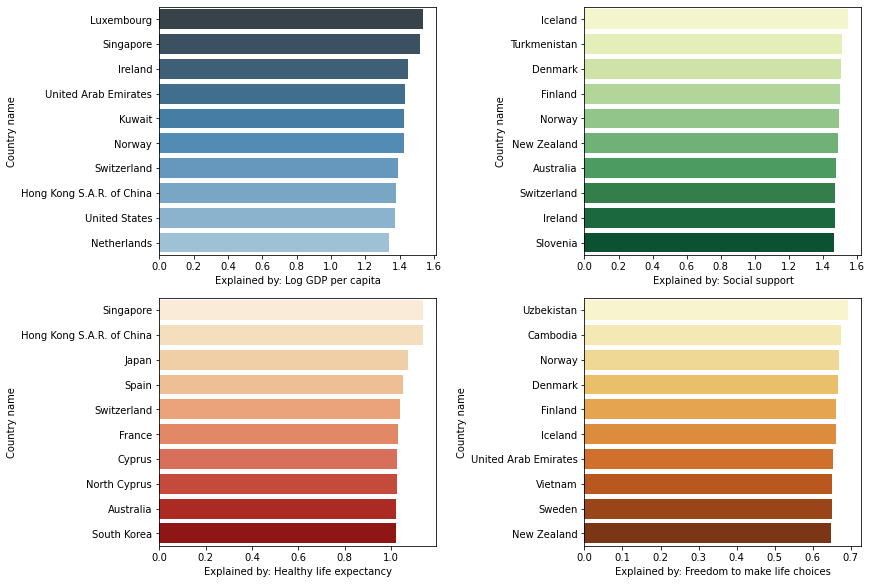

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x= 'Explained by: Log GDP per capita',y='Country name',data=year_2020.nlargest(10,'Explained by: Log GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Explained by: Social support' ,y='Country name',data=year_2020.nlargest(10,'Explained by: Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Explained by: Healthy life expectancy' ,y='Country name',data=year_2020.nlargest(10,'Explained by: Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Explained by: Freedom to make life choices' ,y='Country name',data=year_2020.nlargest(10,'Explained by: Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

In [24]:
new = merged_4.set_index('Country')
new
new.loc[['Switzerland'], ['2015 happiness score']].values.tolist()

[[7.587000000000001]]

In [25]:
def plot(country_names, column='happiness score'):
    """
    Plots the happiness score 2015-2020
    """
    fig = go.Figure()
    
    years = [2015, 2016, 2017, 2018, 2019, 2020]
    cols = ['2015 ' + column, '2016 ' + column, '2017 ' + column, '2018 ' + column, '2019 ' + column, '2020 ' + column]
    
    for name in country_names:
        fig.add_trace(go.Scatter(x=years ,y=new.loc[[name], cols].values.tolist()[0],
                            mode='lines',
                            name=name))


    fig.update_layout(
        title="World {} (2015-2020)".format(column),
        xaxis_title="Year",
        yaxis_title=column,
        legend_title="Country",
        font=dict(
            size=15,
        )
    )
    
    fig.show()
    
plot(['Switzerland', 'United States'], column='gdp per capita')

In [26]:
data = dict(type = 'choropleth', 
           locations = year_2020['Country name'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = year_2020['Ladder score'], 
           text = year_2020['Country name'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

## Look at countries most deviated from 2015-2020


Get the countries that deviated the most and see how they compare across time

In [43]:
def describe_by_country(countries, column='happiness score'):
    years = ['2015', '2016', '2017', '2018', '2019', '2020']
    col_names = ["{} {}".format(str(year), column) for year in years]
    
    # modify for parameters
    return new.loc[countries, col_names].apply(pd.DataFrame.describe, axis=1)

describe_by_country(merged_4['Country'].values.tolist())

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Switzerland,6.0,7.519483,0.043739,7.4800,7.48875,7.5015,7.547175,7.5870
Iceland,6.0,7.509917,0.025413,7.4940,7.49650,7.5025,7.504375,7.5610
Denmark,6.0,7.562600,0.050201,7.5220,7.52625,7.5410,7.588750,7.6456
Norway,6.0,7.532167,0.038845,7.4880,7.50400,7.5295,7.549750,7.5940
Canada,6.0,7.330850,0.073985,7.2321,7.28750,7.3220,7.385000,7.4270
...,...,...,...,...,...,...,...,...
Afghanistan,6.0,3.355150,0.438653,2.5669,3.24225,3.4675,3.617750,3.7940
Rwanda,6.0,3.417550,0.080937,3.3123,3.35250,3.4365,3.469500,3.5150
Benin,6.0,4.120167,0.776027,3.3400,3.52725,3.8990,4.697500,5.2160


In [48]:
merged_4['Country'].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            128, 129, 130, 131, 132, 133, 134, 135, 136, 137],
           dtype='int64', length=138)

In [50]:
# sorted by top 10 most deviated 
sorted_by_std = describe_by_country(merged_4['Country'].values.tolist() , column='happiness score').sort_values(by=['std'], inplace=False, ascending=False).head(10)
# get the top 10 most deviated
sorted_by_std

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Venezuela,6.0,5.451700,0.826532,4.707,4.86780,5.1516,5.87550,6.8100
Benin,6.0,4.120167,0.776027,3.340,3.52725,3.8990,4.69750,5.2160
Ivory Coast,6.0,4.433217,0.615602,3.655,3.98200,4.4255,4.87575,5.2333
Guinea,6.0,4.036217,0.582338,3.507,3.61925,3.8100,4.39150,4.9493
Togo,6.0,3.651367,0.529482,2.839,3.35100,3.7470,4.06350,4.1872


In [57]:
top5_most_volatile_happiness = sorted_by_std.index.values.tolist()
# Let's plot against the US
plot(top5_most_volatile_happiness + ['United States'])

In [29]:
"""
fig = go.Figure()
years = [2015, 2016, 2017, 2018, 2019, 2020]

fig.add_trace(go.Scatter(x=years ,y=sorted_by_std.loc[[name], 'std'].values.tolist()[0:9],
                            mode='lines',
                            name=name))


 
fig.show()
    """
# need help here

 sorted_by_std['std'].values.tolist()
fig = go.Figure()
years = [2015, 2016, 2017, 2018, 2019, 2020]
fig.add_trace(go.Scatter(x = years, y =))
                         

IndentationError: unexpected indent (<ipython-input-29-6b21f27c383f>, line 15)

## References
<a id="references"></a>

Helliwell, John F., Richard Layard, Jeffrey Sachs, and Jan-Emmanuel De Neve, eds. 2020. World Happiness Report 2020. New York: Sustainable Development Solutions Network

“Mortality and Global Health Estimates.” World Health Organization, World Health Organization, www.who.int/publications/data/gho/data/themes/mortality-and-global-health-estimates. 

https://www.who.int/data/gho/indicator-metadata-registry/imr-details/66#:~:text=Average%20number%20of%20years%20that,to%20disease%20and%2For%20injury.

https://worldhappiness.report/faq/


Bubble Chart Tutorial:
https://www.kaggle.com/aashita/guide-to-animated-bubble-charts-using-plotly